# Intro to Keras, Tensorflow and advanced NN


<center><img src="figures/keras-tensorflow-logo.jpg"></center>

## Introduction

* TensorFlow is an end-to-end open source platform for ML 
* It has a comprehensive, flexible ecosystem of tools and libraries 
* Allows to easily build and deploy ML powered applications.
* Not only Neural Networks




## https://keras.io

* Keras is a high-level neural networks API (front-end), written in Python
* Capable of running on top of TensorFlow, CNTK, or Theano (backends)
* Built to simplify access to more complex backend libraries

## https://keras.io

Use Keras if you need a deep learning library that:

* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.


## https://tensorflow.org

Use *TensorFlow* if you want a finer level of control:

* Build your own NN layers
* Personalized cost function
* More complex architectures than those available on Keras
    
We will be mostly writing python code using Keras libraries, but "under the hood" Keras is using tensorflow libraries.

The documentation is at [keras.io](https://keras.io).


## If you want to use R instead of python

* Keras can run on R as well, it will look quite similar to the code in this notebook
* (but, you know, with <- instead of =)
* You find the docs here: https://keras.rstudio.com/
* Probably better support if you stick with python

## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.





## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.

## TensorFlow operates on tensors

> TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors.

## The first step is to build a graph of operations

* NNs are defined in TensorFlow as graphs through which the data flows until the final result is produced
* Before we can do any operation on our data (images, etc) we need to build the graph of tensor operations
* When we have a full graph built from input to output, we can run (flow) our data (training or testing) through it.


## Tensors and data are *not* the same thing
* Tensors are, rather, a symbolic representation of the data
* Think about the function $g = f(x)$: as long as we do not assign a value to $x$, we will not have a fully computed $g$
* In this case, $g$ is the output tensor, $x$ the input tensor, $f$ the tensor operation (a Neural Network?)


## Example

* We have a set of color images of size $1000x1000$ pixels (1 megapixel) that we want to use on our NN 
* We define tensors with shape $(n, 1000, 1000, 3)$
    * $n$ is the number of images that we are presenting to our network in one go (a "batch")
    * $1000x1000$: image pixels
    * $3$ is the number of channels (RGB)
    * Grayscale images tensors would have shape $(n, 1000, 1000, 1)$

## One thing to remember when operating on tensors

The dimensions between tensors coming out of the $i$-th node and those going into the $(i+1)$-th node *must* match:

* If each sample in our dataset is made of 10 features, the first (input) layer must accept a tensor of shape $(n, 10)$
* If the first layer in our NN outputs a 3D tensor, the second layer must accept a 3D tensor as input
* Check the documentation to make sure what input-output shapes are allowed ([example](https://keras.io/api/layers/convolution_layers/convolution1d/))

## Here's how a NN layer looks like in TensorFlow:

* 7 samples in batch
* 784 inputs
* 500 outputs

<center><img src="figures/run_metadata_graph.png"></center>

## Here is how a model is built and trained in Keras

```python
#Multi-layer perceptron (one hidden layer)
model = Sequential()
model.add(Dense(3, input_dim=3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#Gradient descent algorithm, Mean Squared Error as Loss function
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#Training for 10 iterations of the data (epochs)
history = model.fit(data, labels, epochs=10, batch=32)
...
```

What does each bit do?

## A neural network in Keras is called a Model

The simplest kind of model is of the Sequential kind:

In [2]:
from tensorflow.keras.models import Sequential

model = Sequential()

This is an "empty" model, with no layers, no inputs or outputs are defined either.

Adding layer is easy:

In [3]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))



A "Dense" layer is a fully connected layer as the ones we have seen in Multi-layer Perceptrons.
The above is equal to having this network:

<center><img src="figures/simplenet.png"></center>


If we want to see the layers in the Model this far, we can just call:

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Notice the number of parameters, can you tell why 12 and 8 parameters for each layer?

Using "model.add()" keeps stacking layers on top of what we have:

In [5]:
model.add(Dense(units=2, activation=None))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


One can also declare the model in one go, by passing a list of layers to Sequential() like so:

In [6]:
model = Sequential([
    Dense(units=3, activation='relu', input_dim=3),
    Dense(units=2, activation='softmax'),
    Dense(units=2, activation=None)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


If we want to see the layers in the Model this far, we can just call:

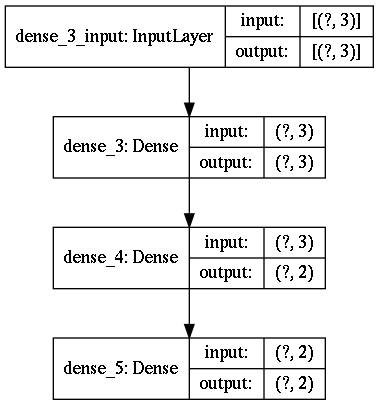

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, "figures/simplenet_model.png", show_shapes=True)

## Small exercise

* Can you write code to make a simple NN model on Keras?
* Open the `exercises` jupyter notebook

## Keras layers (https://keras.io/api/layers/)

Common layers (we will cover most of these!)

* Trainable
    * <font color='red'>Dense (fully connected/MLP)</font>
    * Conv1D (2D/3D)
    * MaxPooling1D (2D/3D)
    * Recurrent: LSTM/GRU/Bidirectional


* Non-trainable
    * <font color='red'>Dropout</font>
    * Flatten
    * Merge (Add/Multiply/Subtract/Concatenate)
    * <font color='red'>Activation (Softmax/ReLU/Sigmoid/...)</font>

## Compiling a model

Once we have defined a model we want to "compile" it

This means chosing a Loss function and an Optimizer (the algorithm that finds the minimum loss possible).

In [8]:
model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

## Losses (https://keras.io/api/losses/)

These are the functions used to evaluate and train the neural network

Common losses for classification problems:
* CategoricalCrossentropy
* SparseCategoricalCrossentropy
* KLDivergence

Common losses for regression problems:
* MeanSquaredError
* MeanAbsoluteError

## Metrics (https://keras.io/api/metrics/)

Common metrics for classification:
* Accuracy/CategoricalAccuracy (respectively for integer labels or one-hot labels)
* SparseCategoricalCrossentropy/CategoricalCrossentropy (integer/one-hot labels)
* Precision/Recall
* AUC

Common metrics for regression:
* MeanSquaredError
* MeanAbsoluteError

## Metrics (https://keras.io/api/metrics/)

Notice the "metrics" parameter, which accepts a list of values. Multiple metrics can be shown during training.
Metrics are only to visualize how the training is going, they don't have an effect on training itself

In [9]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1.0),   #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy', 'recall'])         #the metric doesn't influence the training

## Optimizers (https://keras.io/api/optimizers/)

* They are algorithms for gradient descent
* A few to choose from:
    * SGD (Stochastic Gradient Descent)
    * RMSprop (Root Mean Square propagation)
    * Adadelta (Adaptive delta)
    * Adam (Adaptive Moment estimation)


<br>
<br>
<br>
<br>
<img src="figures/gradient_descent.png">

## Gradient Descent 

We have seen how gradient descent works:

For each epoch:
* Get predicted $y$ ($ŷ$) for all $N$ samples
* Calculate error (loss)
* Calculate all gradients (backprop)
* Apply gradients to weights
    
Pros/cons:
* Stable procedure
* Guarantees lower error at next step
* Will get stuck at local minimum

<br>
<br>
<br>
<br>
<img src="figures/gradient_descent.png">

## Stochastic Gradient Descent
For each epoch:
* Divide data in batch blocks of size $n < N$
* For each of the $N/n$ blocks:
    * Get predicted $y$ for $n$ samples
    * Calculate partial loss
    * Calculate gradients (backprop)
    * Apply gradients to weights

Pros/cons:
* Noisy gradients
* Error will still go down overall
* Less likely to get stuck at local minimum

<br>
<br>
<br>
<br>
<img src="figures/gradient_descent.png">

## Optimizers (https://keras.io/api/optimizers/)

We need to choose a learning rate to multiply to our gradient. If it is too small, we risk taking too long to get to a minimum
<center><img src="figures/small_lr.png"></center>

## Optimizers (https://keras.io/api/optimizers/)

If it is too large, the network risks becoming unstable, explode

<center><img src="figures/large_lr.png"></center>

## Optimizers (https://keras.io/api/optimizers/)

Luckily there are algorithms to address these issues:
* Increase descent speed when past gradients agree with current, slow down otherwise (momentum)
* Annealing (decrease learning rate with passing time)
* Different learning rates for different parameters
* Adaptive learning rate based on gradient

<br>
<br>
<br>
<br>
<img src="figures/adaptive_lr.png">

## Optimizers (https://keras.io/api/optimizers/)

* They are algorithms for gradient descent
* A few to choose from:
    * SGD (stochastic gradient descent)
        * One learning rate, fixed
        * Old, but works well with Nesterov momentum
    * RMSprop
        * One learning rate per parameter
        * Adaptive learning rate (divide by squared mean of past gradients)
    * Adadelta (adaptive learning rate)
        * Similar to RMSprop, no need to set initial learning rate
    * Adam (Adaptive moment estimation)
        * Combines pros from RMSprop, Adadelta, works well with most problems


## Optimizers (https://keras.io/api/optimizers/)
<br>
<br>
<center><img src="figures/adam_et_al.png" width=500></center>
<div style="text-align: right">("Adam: A Method for Stochastic Optimization", 2015)</div>

## Training the model: fit() function (https://keras.io/api/models/model_training_apis/)

* We are almost ready to train the model, I swear
* fit() is a method of the Model, actually launches training on a dataset with features and labels
* X_train, y_train: features and labels
* batch: how many samples between each weight update
* epochs: how many times we iterate through the dataset
* validation_data: used to evaluate the model at the end of every epoch, NOT used for training

```python
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch=32, epochs=10, validation_data=(X_val, y_val))
```

## Training the model: fit() function (https://keras.io/api/models/model_training_apis/)

* Ok, last thing we need is the actual data, then we can train the model

```python
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch=32, epochs=10, validation_data=(X_val, y_val))
```

## What is this validation thing? Do I really need it?

* Yes, yes you do
* Helps understanding if the model is learning anything useful
* Take some of your labelled data, set it aside, call it validation set and don't train on it
* Evaluate model on validation set at the end of each epoch, see if model works on unseen data
* If it works well on training set but not on validation set, you're overfitting

<img src="figures/overfitting_class.png" width=300>

## What is this validation thing? Do I really need it?

* If it works well on training set but not on validation set, you're overfitting
* Validation data is used to adapt hyperparameters, select best models
* Validation data is NOT testing data (those metrics do not go on papers!)
* More on this later

<img src="figures/early_stopping.png" width=500>

## Ok, can we PLEASE train a NN now?

* Let's generate some artificial data, see what happens
* Classification dataset, 2 classes
* Let's say 10,000 samples, three features per sample
* Random data

In [10]:
import numpy as np

# Generate dummy data
data = np.random.random((10000, 3))
labels = np.random.randint(2, size=(10000, 1))

#let's print the first sample (three floats) and its corresponding label:
print(np.hstack((data[0:10,:], labels[0:10])))

[[0.02589226 0.92052427 0.16888132 1.        ]
 [0.91135014 0.01415482 0.09449423 1.        ]
 [0.87853703 0.28195812 0.91734206 0.        ]
 [0.12799054 0.30190608 0.48584771 1.        ]
 [0.74849932 0.9361266  0.74450473 1.        ]
 [0.64875586 0.70873398 0.1183907  0.        ]
 [0.62183144 0.03260474 0.64878675 1.        ]
 [0.29987576 0.41628735 0.66197287 1.        ]
 [0.53312261 0.35190413 0.95216497 1.        ]
 [0.99779795 0.73331877 0.67051393 1.        ]]


## We have the data, now make the model, compile it, train it

* At the last layer of a classifier use the _softmax_ activation (more on this later)
* Batch size is 32, 10 epochs
* Take 10% of the data, reserve it for validation

In [11]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 1s 3ms/step - loss: 0.6968 - accuracy: 0.4990 - val_loss: 0.6940 - val_accuracy: 0.4830
Epoch 2/10
282/282 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6942 - val_accuracy: 0.4960
Epoch 3/10
282/282 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6941 - val_accuracy: 0.4950
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6941 - val_accuracy: 0.4870
Epoch 5/10
282/282 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5039 - val_loss: 0.6938 - val_accuracy: 0.4850
Epoch 6/10
282/282 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5086 - val_loss: 0.6941 - val_accuracy: 0.4840
Epoch 

## Let's visualize our training curves

* Plots loss and accuracy for train and validation sets separately


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()


## Let's visualize our training curves

* Plots loss and accuracy for train and validation sets separately
* The model didn't learn anything, which makes sense (data is random)

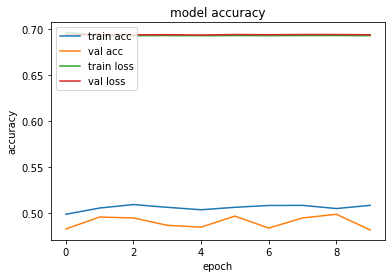

In [13]:
plot_loss_acc(history)

## Do it again, but with data that actually means something

* A XOR function is not linear
* A perceptron is not able to separate XOR classes
* A MLP should be able to

<img src="figures/3-IP-TRUTH-TABLE2.jpg">


Let's generate data that is not just binary, but behaves like it:

* A positive (+) input behaves like a 1
* A negative (-) input behaves like a 0
* -0.5 $\oplus$ 0.2 $\oplus$ -0.1 => 1

In [14]:
# Generate XOR data
data = np.random.random((10000, 3)) - 0.5
labels = np.zeros((10000, 1))

labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(3):
    print("{0: .2f} xor {1: .2f} xor {2: .2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

 0.16 xor -0.20 xor  0.27 equals 0.0
 0.40 xor -0.49 xor -0.11 equals 1.0
 0.31 xor -0.14 xor  0.18 equals 0.0


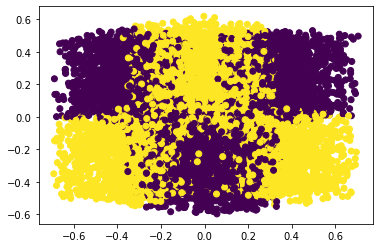

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(data)
plt.scatter(transformed[:,0], transformed[:,1], c=labels)

Now let's fit a model to the data:

In [20]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5402 - val_loss: 0.6968 - val_accuracy: 0.5240
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6833 - accuracy: 0.5979 - val_loss: 0.6867 - val_accuracy: 0.5800
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6692 - accuracy: 0.6311 - val_loss: 0.6752 - val_accuracy: 0.5910
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.6482 - accuracy: 0.6606 - val_loss: 0.6588 - val_accuracy: 0.6200
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6242 - accuracy: 0.6782 - val_loss: 0.6431 - val_accuracy: 0.6420
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6050 - accuracy: 0.6810 - val_loss: 0.6321 - val_accuracy: 0.6440
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5921 - accuracy: 0.6827 - val_loss: 0.6280 - val_accuracy: 0.6400
Epoch 

## XOR data

* Better than random!
* Notice the difference between train and validation curves

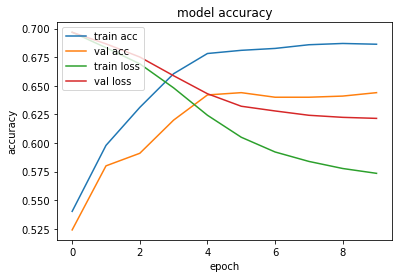

In [21]:
plot_loss_acc(history)

## Exercise: can you do better?

* Check the exercise notebook!

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.1)